In [ ]:
"""
Units of quantities--->
torque: N/m
pressures: bar
air/water flow: Lt/min
noise: db
ground accelerations along x,y,z axes (gaxxy,gaccy,gaccz): m/s^2
head accelerations (haxxy,haccy,haccz) along x,y,z axes: m/s^2
rpm: revolutions/min
powers: Watt
temperatures: (degree)C
source: https://www.kaggle.com/datasets/afumetto/predictive-maintenance-dataset-air-compressor?select=data.csv
"""

'\nUnits of quantities--->\ntorque: N/m\npressures: bar\nair/water flow: Lt/min\nnoise: db\nground accelerations along x,y,z axes (gaxxy,gaccy,gaccz): m/s^2\nhead accelerations (haxxy,haccy,haccz) along x,y,z axes: m/s^2\nrpm: revolutions/min\npowers: Watt\ntemperatures: (degree)C\nsource: https://www.kaggle.com/datasets/afumetto/predictive-maintenance-dataset-air-compressor?select=data.csv\n'

In [1]:
# Load dataset
import pandas as pd
df=pd.read_csv("processed_data - final.csv")

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
df['outlet_pressure_bar'].plot()
plt.title("Outlet Pressure (in bar)")

Text(0.5, 1.0, 'Outlet Pressure (in bar)')

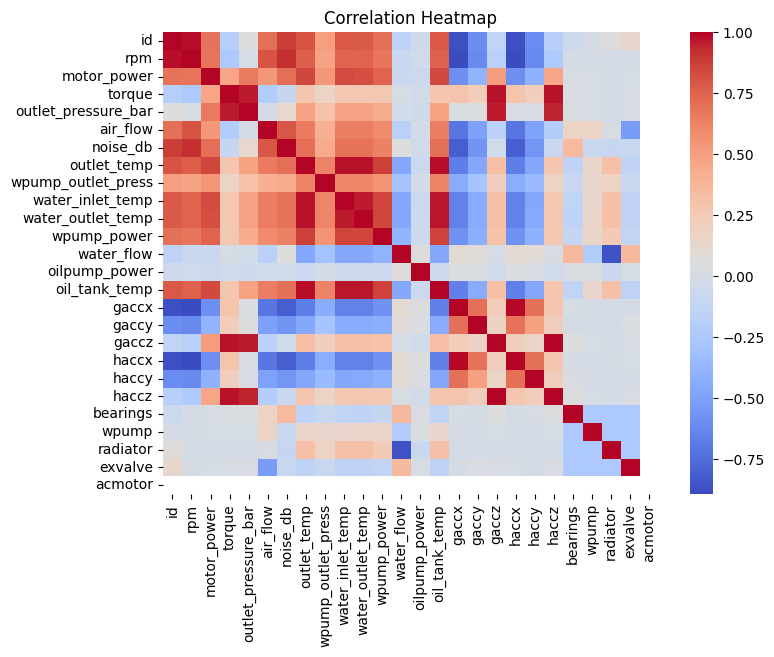

In [ ]:
# Observing Correlation for feature selection
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [2]:
# Dropping unimportant features
df=df.drop(['id','oilpump_power','gaccx','gaccy','gaccz','haccx','haccy','haccz','acmotor'],axis=1)

In [3]:
X = df.drop(['outlet_pressure_bar'],axis=1)
y = df['outlet_pressure_bar']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X.columns)

In [ ]:
"""
# Scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.head()
"""

rpm  motor_power    torque  outlet_pressure_bar  air_flow  noise_db  \
0 -1.414501    -1.307440 -1.159221            -1.640349 -1.008727 -1.561431   
1 -1.394708    -1.295365 -0.971045            -1.596843 -1.009758 -1.605684   
2 -1.420156    -1.266100 -0.839768            -1.442157 -1.010789 -1.551736   
3 -1.441362    -1.235583 -0.684141            -1.269208 -1.011698 -1.609816   
4 -1.415915    -1.223030 -0.584946            -1.247724 -1.012021 -1.512592   

   outlet_temp  wpump_outlet_press  water_inlet_temp  water_outlet_temp  \
0    -2.108796            0.353860         -2.138658          -2.403142   
1    -2.195234           -0.577740         -1.914585          -2.025159   
2    -2.161525           -1.509341         -1.809172          -2.245144   
3    -2.030032           -1.564841         -1.939012          -1.846022   
4    -2.078671           -1.012497         -1.745235          -2.072820   

   wpump_power  water_flow  oil_tank_temp  bearings  wpump  radiator  exvalve  
0    -1.477725    0.816663      -2.200995      -0.5   -0.5      -0.5     -0.5  
1    -1.799244    0.828340      -2.103022      -0.5   -0.5      -0.5     -0.5  
2    -2.127082    0.810114      -2.004340      -0.5   -0.5      -0.5     -0.5  
3    -1.688099    0.809391      -2.145555      -0.5   -0.5      -0.5     -0.5  
4    -1.987954    0.828677      -2.142528      -0.5   -0.5      -0.5     -0.5

In [ ]:
"""
# Target variable: outlet_pressure_bar
from sklearn.model_selection import train_test_split
X = scaled_data.drop(['outlet_pressure_bar'],axis=1)
y = scaled_data['outlet_pressure_bar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train =  y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
"""

Training set shape: (800, 16) (800, 1)
Testing set shape: (200, 16) (200, 1)


In [5]:
# Building the model
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3, weights='uniform', metric='manhattan', algorithm='brute', p=1)
model.fit(scaled_X_train, y_train)

KNeighborsRegressor(algorithm='brute', metric='manhattan', n_neighbors=3, p=1)

In [6]:
# Predicting on test data
predictions = model.predict(scaled_X_test)

In [7]:
# Calculating RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.3390907285996216
